## Install Dependencies

In [3]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
!cd yolov5 & pip install -r requirements.txt

In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

## Load Model

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\IKHWAN/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-10-28 Python-3.9.18 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [9]:
model 

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## Make Detections

In [10]:
img = 'https://library.sportingnews.com/styles/twitter_card_120x120/s3/2022-04/Man%20United%20squad%20list.jpg?itok=VtZfvDHp'

In [11]:
results = model(img)
results.print()

image 1/1: 1080x1920 3 persons
Speed: 747.0ms pre-process, 109.9ms inference, 22.2ms NMS per image at shape (1, 3, 384, 640)


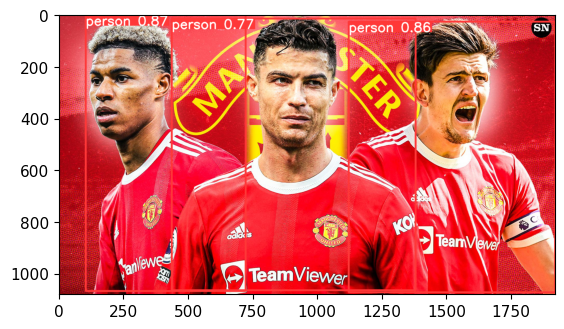

In [12]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [13]:
results.xyxy

[tensor([[1.03727e+02, 4.28142e+00, 7.22050e+02, 1.06846e+03, 8.74713e-01, 0.00000e+00],
         [1.12105e+03, 2.97500e+01, 1.92000e+03, 1.07325e+03, 8.61401e-01, 0.00000e+00],
         [4.36544e+02, 1.72370e+01, 1.38054e+03, 1.06578e+03, 7.68426e-01, 0.00000e+00]], device='cuda:0')]

In [14]:
np.squeeze(results.render()).shape

(1080, 1920, 3)

In [15]:
np.array(results.render()).shape

(1, 1080, 1920, 3)

In [16]:
img2 = 'https://st2.depositphotos.com/3161575/10865/i/950/depositphotos_108650300-stock-photo-shibuya-crossing-in-tokyo.jpg'

In [17]:
results = model(img2)
results.print()

image 1/1: 682x1023 17 persons, 9 handbags, 1 suitcase
Speed: 1253.6ms pre-process, 91.3ms inference, 14.0ms NMS per image at shape (1, 3, 448, 640)


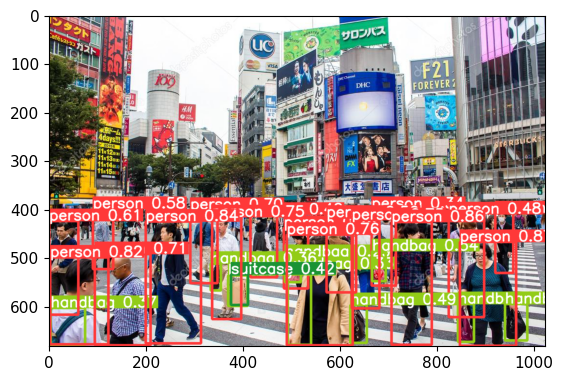

In [18]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [19]:
img3 = 'https://media.istockphoto.com/id/476239495/photo/traffic-jam-on-rush-hour-istanbul.jpg?s=612x612&w=0&k=20&c=GeylwQQJfhClBB717f_8hLcOiAONvlXzL2_icYWk2u0='

In [20]:
results = model(img3)
results.print()

image 1/1: 408x612 3 persons, 42 cars, 2 buss, 1 truck
Speed: 1007.1ms pre-process, 46.7ms inference, 0.0ms NMS per image at shape (1, 3, 448, 640)


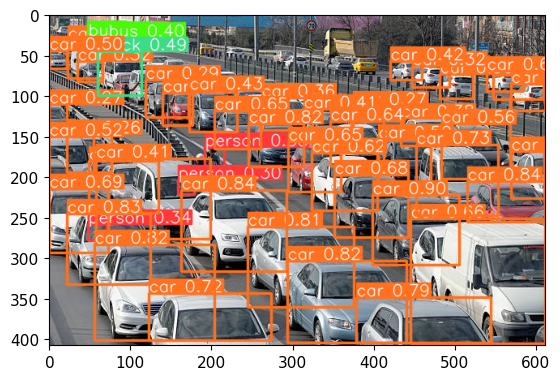

In [21]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

## Real Time Detection

In [23]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Train Fro Scratch

In [60]:
import uuid  # Uniqe Indetifier
import os
import time

In [66]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [83]:
cap = cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, images number {}'.format(label, img_num))
        
        # Webcam feed 
        ret, frame = cap.read()
        
        # Naming Out Image Path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1()+'.jpg'))
        
        # Write out image to file
        cv2.imwrite(imgname, frame)
        
        # Render to Screen
        cv2.imshow('Image Collection', frame)
        
        # 2 Second between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [1]:
print(os.path.join(IMAGES_PATH, labels[0] + '.' +str(uuid.uuid1())+'.jpg'))

NameError: name 'os' is not defined

In [1]:
for label in labels:
    print(f'collecting image for {label}')
    for img_num in range(number_imgs):
        print('Collecting images for {}, images number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1()))
        print(imgname)

NameError: name 'labels' is not defined

## Load Model